# Medidas de Tendência Central

Inicialmente, vamos importar as bibliotecas necessárias:

In [1]:
import numpy as np
from scipy import stats

## Média

Considere o vetor de dados $\mathbf{x}$:
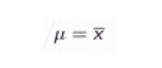

In [2]:
x = np.array([1, 3, 4, 2, 7, 6, 8])

Note que preferimos sempre trabalhar com o tipo $\texttt{numpy array}$:

In [3]:
print(type(x))

<class 'numpy.ndarray'>


Para calcular a média dos valores de $\mathbf{x}$, basta fazer:

In [4]:
mu = np.mean(x)
print('mu =', mu)

mu = 4.428571428571429


Considere agora uma matriz $A$:

In [5]:
A = np.array([[1, 2, 3],[1, 2, 2],[3, 2, 1],[1, 1, 1]])
print('A = \n', A)

A = 
 [[1 2 3]
 [1 2 2]
 [3 2 1]
 [1 1 1]]


Se fizermos

In [6]:
np.mean(A)

1.6666666666666667

Obteremos a média de todos os valores de $A$.

Mas, se quisermos a média por coluna, devemos fazer especificar a dimensão a ser utilizada com $\texttt{axis}$:

In [7]:
mu_col = np.mean(A, axis=0)
print('Média por coluna:', mu_col)

Média por coluna: [1.5  1.75 1.75]


Para a média por linha, usamos:

In [8]:
mu_row = np.mean(A, axis=1)
print('Média por linha:', mu_row)

Média por linha: [2.         1.66666667 2.         1.        ]


Apenas para deixar mais elegante:

In [9]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print('mu_row =', mu_row)

mu_row = [ 2.000  1.667  2.000  1.000]


## Moda

Um outro tipo de medida de tendência central é a _moda_, que é o valor mais frequente do vetor de dados.<br>
Por exemplo:

In [10]:
y = np.array([2, 4, 6, 2, 5, 6, 2, 9, 4, 5, 2, 1])

In [12]:
moda = stats.mode(y)
print('moda =', moda[0], ' que aparece', moda[1], 'vezes.')

moda = [2]  que aparece [4] vezes.


O resultado acima nos dá o valor mais frequente (2) e sua frequência (4).

Voltando ao exemplo da matriz $A$:

In [13]:
A

array([[1, 2, 3],
       [1, 2, 2],
       [3, 2, 1],
       [1, 1, 1]])

temos:

In [14]:
stats.mode(A)

ModeResult(mode=array([[1, 2, 1]]), count=array([[3, 3, 2]]))

ou seja, o número 1 é o valor mais frequente da primeira coluna, aparecendo nela 3 vezes; 

o número 2 é o valor mais frequente da segunda coluna, aparecendo 3 vezes; e

o número 1 é o valor mais frequente da primeira coluna, aparecendo 2 vezes.

Para o cálculo por linhas, fazemos:

In [15]:
stats.mode(A, axis=1)

ModeResult(mode=array([[1],
       [2],
       [1],
       [1]]), count=array([[1],
       [2],
       [1],
       [3]]))

## Mediana

Se ordenamos os vetores $\mathbf{x}$ e $\mathbf{y}$, obteremos:

In [16]:
np.sort(x)

array([1, 2, 3, 4, 6, 7, 8])

In [17]:
np.sort(y)

array([1, 2, 2, 2, 2, 4, 4, 5, 5, 6, 6, 9])

Agora, é fácil ver que:

In [19]:
np.median(x)

4.0

In [20]:
np.median(y)

4.0

Para vermos que a mediana é menos sensível a valores extremos, façamos:

In [22]:
z = np.array([1, 3, 4, 2, 237, 6, 8])

E calculemos:

In [23]:
np.mean(z)

37.285714285714285

e

In [30]:
print(np.sort(z))
np.median(z)

print(A,'\n', np.median(A, axis=0) )

[  1   2   3   4   6   8 237]
[[1 2 3]
 [1 2 2]
 [3 2 1]
 [1 1 1]] 
 [ 1.000  2.000  1.500]


Notemos que $4.0$ representa bem melhor a tendência central do vetor $\mathbf{z}$ que $37.29$.

## Média x Mediana

Agora, consideremos um exemplo mais real do uso da média e da mediana.

Vamos isolar o fundo das seguintes imagens:

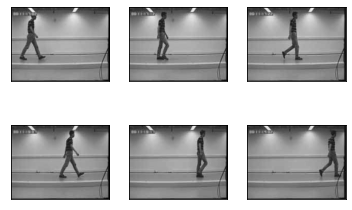

In [25]:
from matplotlib import pyplot as plt

img = []
for i in range(1,7):
    file = '../figuras/walking_man_0' + str(i) + '.jpg'
    img.append(plt.imread(file,0))
    img[i-1] = img[i-1].astype(float)
    img[i-1] = img[i-1]/255.0
    plt.subplot(2, 3, i)
    plt.imshow(img[i-1], cmap='gray')
    plt.xticks([])
    plt.yticks([])

Uma ideia é calcular a média das imagens, o que nos dá:

([], [])

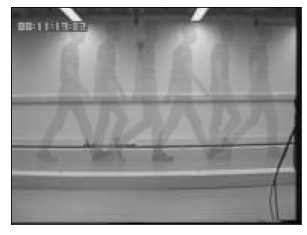

In [26]:
avg_img = img[0].copy()
for i in range(1,6):
    avg_img += img[i]
avg_img = avg_img/6.0
plt.imshow(avg_img, cmap='gray')
plt.xticks([])
plt.yticks([])

Conseguimos um resultado razoável, mas precisaríamos de muitas imagens para reduzir os "fantasmas".

Vejamos o que acontece quando aplicamos a mediana:

shape:  (6, 144, 192)


([], [])

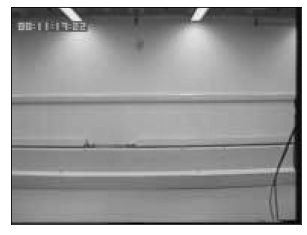

In [33]:
median_img = np.median(img,axis=0)
print('shape: ', np.array(img).shape)
plt.imshow(median_img, cmap='gray')
plt.xticks([])
plt.yticks([])

   ## Banco de Dados Iris

Vamos calcular algumas medidas de tendência central com o banco de dados Iris.

In [34]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

As médias de cada característica por espécie são:

In [35]:
mu_setosa = np.mean(X[0:50,:], axis=0)
mu_versicolor = np.mean(X[50:100,:], axis=0)
mu_virginica = np.mean(X[100:150,:], axis=0)
print('Médias da Iris setosa     =', mu_setosa)
print('Médias da Iris versicolor =', mu_versicolor)
print('Médias da Iris virginica  =', mu_virginica)

Médias da Iris setosa     = [ 5.006  3.428  1.462  0.246]
Médias da Iris versicolor = [ 5.936  2.770  4.260  1.326]
Médias da Iris virginica  = [ 6.588  2.974  5.552  2.026]


Assim, a espécie Iris viginica possui, em média, maiores comprimento de sépala, comprimento e largura de pétala, enquanto que a setosa possui maior largura de sépala que as outras espécies.

Iris setosa caract 3 tem um valor médio de 1.462 comparando com 4.260 (Iris versicolor), logo consegue ser bem separado para uma classificação linear, já o mesmo atributo da Iris versicolor e Iris virginica, não são tão distances como comparado o Iris setosa  e Iris versicolor, logo pode existir um pouco mais de dificuldade em separar/classificar.


Vejamos alguns gráficos.

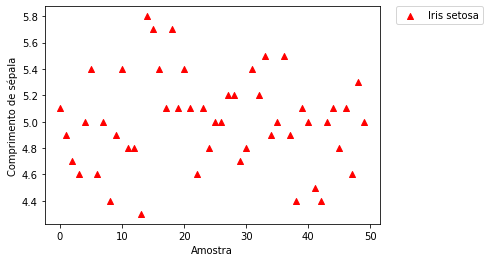

In [36]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)
eixo_x = range(50)
ax1.scatter(eixo_x, X[0:50,0], c='r', marker='^', label="Iris setosa")
ax1.set_xlabel('Amostra')
ax1.set_ylabel('Comprimento de sépala')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Note que esse tipo de gráfico pouco nos informa sobre as tendências dos dados.<br>
Para visualizarmos tendências, usamos o conceito de histograma.

## Histograma

O histograma é um gráfico de frequência de dados.<br>
No eixo das abscissas, estão os valores dos quais se quer a frequência;<br>
no eixo das ordenadas, estão as frequência, i.e., o números de exemplares numa determinada faixa de valores.<br>
É comum usar "caixas" (<em>bins</em>) nas abscissas, isto é, tomam-se faixas de valores ao invés de valores individuais.<br>
Normalmente, as caixas têm a mesma largura.


Text(0, 0.5, 'Número de exemplares')

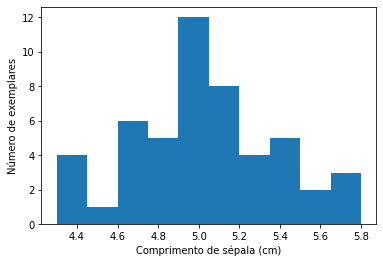

In [37]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
# Para escolher o número de caixas:
plt.hist(X[0:50,0], bins=10)
# Para escolher a largura da caixa:
#binwidth = 0.2
#plt.hist(X[0:50,0], bins=np.arange(min(X[0:50,0]), max(X[0:50,0]) + binwidth, binwidth))
ax2.set_xlabel('Comprimento de sépala (cm)')
ax2.set_ylabel('Número de exemplares')

Repare que o centro de massa desse histograma está em +ou- 5, logo a média é aprox em 5 conforme calculado em células anteriores